In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier 
from keras.utils import to_categorical
from keras.layers import Dense, Activation, Flatten, Input,Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam

Using TensorFlow backend.


In [17]:
class load():
    def load_data(filename):
        raw_data = pd.read_csv(filename)
        raw_data['filename'] = [str(i).zfill(4)+'.jpg' for i in raw_data['Index'].tolist()]
        raw_data['pointsname'] = [str(i).zfill(4)+'.mat' for i in raw_data['Index'].tolist()]
        return raw_data

    #read points data from mat data 
    def load_points(points_path,data):
        n = data.shape[0] 
        points_data = np.zeros([n,3003,2])
        start_time = time.time()
        for i in range(n):
            result = loadmat(points_path+data['pointsname'][i])
            key = sorted(result.keys())[-1] 
            points = result[key]
            distance_h = []
            distance_v = []
            for d in range(points.shape[0]-1):
                for j in range(d+1,points.shape[0]):
                    distance_h.append(abs(points[d,0]-points[j,0]))
                    distance_v.append(abs(points[d,1]-points[j,1]))

            points_data[i,:,0]=distance_h
            points_data[i,:,1]=distance_v
        print("--- %s seconds ---" % (time.time() - start_time))
        return points_data.reshape([2500,6006])

In [20]:
path = '/Users/luyue_chen/Documents/Fall2019-proj3-sec1--proj3-sec1-grp7-master/data/train_set/'
data = load.load_data(path+'label.csv')
points_path = '/Users/luyue_chen/Documents/Fall2019-proj3-sec1--proj3-sec1-grp7-master/data/train_set/points/'
X = load.load_points(points_path,data)
y = data['emotion_idx']
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=123)

--- 22.97139000892639 seconds ---


## GBM (baseline)

### Calculating Accuracy Rate

In [21]:
start_time = time.time()
gbmtree_model = GradientBoostingClassifier(max_depth = 1).fit(train_x,train_y) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 1308.2316908836365 seconds ---


In [24]:
gbm_predictions = gbmtree_model.predict(test_x)
gbm_predictions = [round(value) for value in gbm_predictions]
gbm_accuracy = np.mean(test_y==gbm_predictions)
print("Accuracy: %.2f%%" % (gbm_accuracy *  100.0))

Accuracy: 39.60%


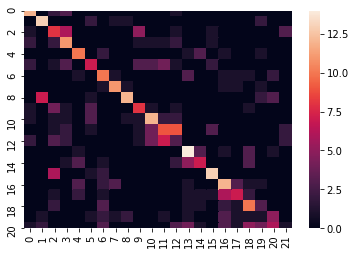

In [27]:
gbm_predictions = gbmtree_model.predict(test_x) 
cn = confusion_matrix(test_y,gbm_predictions)
sns.heatmap(cn)

In [28]:
print(classification_report(test_y,gbm_predictions))

              precision    recall  f1-score   support

           1       0.55      0.67      0.60        18
           2       0.57      0.68      0.62        19
           3       0.24      0.32      0.27        25
           4       0.35      0.52      0.42        21
           5       0.50      0.56      0.53        18
           6       0.32      0.27      0.29        26
           7       0.37      0.50      0.43        20
           8       0.65      0.69      0.67        16
           9       0.71      0.48      0.57        25
          10       0.35      0.40      0.37        20
          11       0.48      0.50      0.49        24
          12       0.38      0.28      0.32        32
          13       0.12      0.12      0.12        24
          14       0.45      0.61      0.52        23
          15       0.44      0.32      0.37        22
          16       0.62      0.59      0.60        22
          17       0.40      0.46      0.43        26
          18       0.47    

### Saving GBM Model

In [ ]:
#gbmtree_model_final = GradientBoostingClassifier(max_depth = 1).fit(X,y) 

In [43]:
#joblib.dump(gbmtree_model_final,'../output/gbm_base.m')

## Neural Network (advanced)

### Build Model

In [30]:
Y = to_categorical(y)
Y = Y[:,1:]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [31]:
input_shape = [6006] 
input_layer = Input(input_shape)
x = BatchNormalization()(input_layer) 
x = Dense(96,activation='relu',kernel_initializer=initializers.glorot_normal(seed=None))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x) 
x = Dense(16,activation='relu',kernel_initializer=initializers.glorot_normal(seed=None))(x)
x = Dropout(0.5)(x)
output_layer = Dense(22,activation='softmax',kernel_initializer=initializers.glorot_normal(seed=None))(x) 
model = Model(input_layer,output_layer)

### Calculating Accuracy Rate

In [33]:
start_time = time.time()
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.01),metrics=['accuracy'])
model.fit(X,Y,epochs=50, batch_size=300)
print('lr=0.01, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model.fit(X,Y,epochs=200, batch_size=250)
print('lr=0.001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.0001),metrics=['accuracy'])
model.fit(X,Y,epochs=200, batch_size=200)
print('lr=0.0001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.00001),metrics=['accuracy'])
model.fit(X,Y,epochs=200, batch_size=200)
print('lr=0.00001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model.fit(X,Y,epochs=200, batch_size=250)
print('lr=0.001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.0001),metrics=['accuracy'])
model.fit(X,Y,epochs=200, batch_size=200)
print('lr=0.0001, train complete')
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.00001),metrics=['accuracy'])
model.fit(X,Y,epochs=50, batch_size=200)
print('lr=0.00001, train complete')
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
2500/2500 [==============================] - 1s 537us/step - loss: 3.3434 - accuracy: 0.0652
Epoch 2/50
2500/2500 [==============================] - 0s 169us/step - loss: 3.0465 - accuracy: 0.0860
Epoch 3/50
2500/2500 [==============================] - 0s 172us/step - loss: 2.9648 - accuracy: 0.0948
Epoch 4/50
2500/2500 [==============================] - 0s 160us/step - loss: 2.8679 - accuracy: 0.1156
Epoch 5/50
2500/2500 [==============================] - 1s 203us/step - loss: 2.7386 - accuracy: 0.1608
Epoch 6/50
2500/2500 [==============================] - 0s 189us/step - loss: 2.6434 - accuracy: 0.1648
Epoch 7/50
2500/2500 [==============================] - 0s 195us/step - loss: 2.5620 - accuracy: 0.1672
Epoch 8/50
2500/2500 [==============================] - 0s 173us/step - loss: 2.4620 - accuracy: 0.2000
Epoch 9/50
2500/2500 [==============================] - 0s 180us/step - loss: 2.3908 - accuracy: 0.2048
Epoch 10/50
2500/2500 [==============================] - 0s 169u

2500/2500 [==============================] - 0s 165us/step - loss: 1.4799 - accuracy: 0.4620
Epoch 29/200
2500/2500 [==============================] - 0s 160us/step - loss: 1.4693 - accuracy: 0.4460
Epoch 30/200
2500/2500 [==============================] - 0s 148us/step - loss: 1.4967 - accuracy: 0.4404
Epoch 31/200
2500/2500 [==============================] - 0s 153us/step - loss: 1.4819 - accuracy: 0.4448
Epoch 32/200
2500/2500 [==============================] - 0s 158us/step - loss: 1.4925 - accuracy: 0.4456
Epoch 33/200
2500/2500 [==============================] - 0s 153us/step - loss: 1.4642 - accuracy: 0.4564
Epoch 34/200
2500/2500 [==============================] - 0s 151us/step - loss: 1.5014 - accuracy: 0.4332
Epoch 35/200
2500/2500 [==============================] - 0s 156us/step - loss: 1.4580 - accuracy: 0.4504
Epoch 36/200
2500/2500 [==============================] - 0s 150us/step - loss: 1.4657 - accuracy: 0.4532
Epoch 37/200
2500/2500 [==============================] - 0

Epoch 105/200
2500/2500 [==============================] - 0s 162us/step - loss: 1.3308 - accuracy: 0.4960
Epoch 106/200
2500/2500 [==============================] - 0s 157us/step - loss: 1.3627 - accuracy: 0.4908
Epoch 107/200
2500/2500 [==============================] - 0s 157us/step - loss: 1.3264 - accuracy: 0.4900
Epoch 108/200
2500/2500 [==============================] - 0s 152us/step - loss: 1.3456 - accuracy: 0.4896
Epoch 109/200
2500/2500 [==============================] - 0s 156us/step - loss: 1.2935 - accuracy: 0.5136
Epoch 110/200
2500/2500 [==============================] - 0s 158us/step - loss: 1.3125 - accuracy: 0.4908
Epoch 111/200
2500/2500 [==============================] - 0s 160us/step - loss: 1.3350 - accuracy: 0.4956
Epoch 112/200
2500/2500 [==============================] - 0s 159us/step - loss: 1.3473 - accuracy: 0.4776
Epoch 113/200
2500/2500 [==============================] - 0s 166us/step - loss: 1.3094 - accuracy: 0.5068
Epoch 114/200
2500/2500 [============

2500/2500 [==============================] - 0s 168us/step - loss: 1.2395 - accuracy: 0.5356
Epoch 182/200
2500/2500 [==============================] - 0s 175us/step - loss: 1.2188 - accuracy: 0.5428
Epoch 183/200
2500/2500 [==============================] - 0s 164us/step - loss: 1.2170 - accuracy: 0.5360
Epoch 184/200
2500/2500 [==============================] - 0s 173us/step - loss: 1.2277 - accuracy: 0.5284
Epoch 185/200
2500/2500 [==============================] - 0s 171us/step - loss: 1.2534 - accuracy: 0.5324
Epoch 186/200
2500/2500 [==============================] - 0s 176us/step - loss: 1.2030 - accuracy: 0.5332
Epoch 187/200
2500/2500 [==============================] - 0s 172us/step - loss: 1.2245 - accuracy: 0.5376
Epoch 188/200
2500/2500 [==============================] - 0s 170us/step - loss: 1.2125 - accuracy: 0.5480
Epoch 189/200
2500/2500 [==============================] - 0s 168us/step - loss: 1.2434 - accuracy: 0.5260
Epoch 190/200
2500/2500 [==========================

2500/2500 [==============================] - 0s 180us/step - loss: 1.2403 - accuracy: 0.5156
Epoch 59/200
2500/2500 [==============================] - 0s 186us/step - loss: 1.1994 - accuracy: 0.5444
Epoch 60/200
2500/2500 [==============================] - 0s 171us/step - loss: 1.1782 - accuracy: 0.5524
Epoch 61/200
2500/2500 [==============================] - 0s 184us/step - loss: 1.1915 - accuracy: 0.5428
Epoch 62/200
2500/2500 [==============================] - 0s 184us/step - loss: 1.1912 - accuracy: 0.5552
Epoch 63/200
2500/2500 [==============================] - 0s 168us/step - loss: 1.2058 - accuracy: 0.5464
Epoch 64/200
2500/2500 [==============================] - 0s 179us/step - loss: 1.2153 - accuracy: 0.5312
Epoch 65/200
2500/2500 [==============================] - 0s 169us/step - loss: 1.1800 - accuracy: 0.5512
Epoch 66/200
2500/2500 [==============================] - 0s 172us/step - loss: 1.2420 - accuracy: 0.5364
Epoch 67/200
2500/2500 [==============================] - 1

2500/2500 [==============================] - 0s 158us/step - loss: 1.1667 - accuracy: 0.5488
Epoch 136/200
2500/2500 [==============================] - 0s 159us/step - loss: 1.2071 - accuracy: 0.5472
Epoch 137/200
2500/2500 [==============================] - 0s 170us/step - loss: 1.2008 - accuracy: 0.5544
Epoch 138/200
2500/2500 [==============================] - 0s 167us/step - loss: 1.1746 - accuracy: 0.5620
Epoch 139/200
2500/2500 [==============================] - 0s 159us/step - loss: 1.1829 - accuracy: 0.5456
Epoch 140/200
2500/2500 [==============================] - 0s 156us/step - loss: 1.1966 - accuracy: 0.5360
Epoch 141/200
2500/2500 [==============================] - 0s 164us/step - loss: 1.1763 - accuracy: 0.5524
Epoch 142/200
2500/2500 [==============================] - 0s 160us/step - loss: 1.1966 - accuracy: 0.5392
Epoch 143/200
2500/2500 [==============================] - 0s 160us/step - loss: 1.1693 - accuracy: 0.5488
Epoch 144/200
2500/2500 [==========================

2500/2500 [==============================] - 0s 179us/step - loss: 1.1573 - accuracy: 0.5548
Epoch 12/200
2500/2500 [==============================] - 0s 174us/step - loss: 1.1755 - accuracy: 0.5400
Epoch 13/200
2500/2500 [==============================] - 0s 181us/step - loss: 1.1782 - accuracy: 0.5452
Epoch 14/200
2500/2500 [==============================] - 0s 190us/step - loss: 1.1709 - accuracy: 0.5504
Epoch 15/200
2500/2500 [==============================] - 0s 175us/step - loss: 1.2176 - accuracy: 0.5392
Epoch 16/200
2500/2500 [==============================] - 0s 175us/step - loss: 1.1770 - accuracy: 0.5484
Epoch 17/200
2500/2500 [==============================] - 0s 164us/step - loss: 1.1587 - accuracy: 0.5616
Epoch 18/200
2500/2500 [==============================] - 0s 180us/step - loss: 1.1574 - accuracy: 0.5528
Epoch 19/200
2500/2500 [==============================] - 0s 161us/step - loss: 1.2055 - accuracy: 0.5420
Epoch 20/200
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 159us/step - loss: 1.1753 - accuracy: 0.5536
Epoch 89/200
2500/2500 [==============================] - 0s 163us/step - loss: 1.1994 - accuracy: 0.5272
Epoch 90/200
2500/2500 [==============================] - 0s 166us/step - loss: 1.1752 - accuracy: 0.5492
Epoch 91/200
2500/2500 [==============================] - 0s 155us/step - loss: 1.2019 - accuracy: 0.5400
Epoch 92/200
2500/2500 [==============================] - 0s 161us/step - loss: 1.1685 - accuracy: 0.5516
Epoch 93/200
2500/2500 [==============================] - 0s 160us/step - loss: 1.1921 - accuracy: 0.5484
Epoch 94/200
2500/2500 [==============================] - 0s 158us/step - loss: 1.1946 - accuracy: 0.5480
Epoch 95/200
2500/2500 [==============================] - 0s 153us/step - loss: 1.2146 - accuracy: 0.5408
Epoch 96/200
2500/2500 [==============================] - 0s 153us/step - loss: 1.1650 - accuracy: 0.5572
Epoch 97/200
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 164us/step - loss: 1.1957 - accuracy: 0.5400
Epoch 165/200
2500/2500 [==============================] - 0s 153us/step - loss: 1.1954 - accuracy: 0.5496
Epoch 166/200
2500/2500 [==============================] - 0s 178us/step - loss: 1.1857 - accuracy: 0.5460
Epoch 167/200
2500/2500 [==============================] - 0s 185us/step - loss: 1.1802 - accuracy: 0.5436
Epoch 168/200
2500/2500 [==============================] - 0s 155us/step - loss: 1.1762 - accuracy: 0.5560
Epoch 169/200
2500/2500 [==============================] - 0s 169us/step - loss: 1.1942 - accuracy: 0.5412
Epoch 170/200
2500/2500 [==============================] - 0s 168us/step - loss: 1.2093 - accuracy: 0.5328
Epoch 171/200
2500/2500 [==============================] - 0s 167us/step - loss: 1.2069 - accuracy: 0.5400
Epoch 172/200
2500/2500 [==============================] - 0s 162us/step - loss: 1.1563 - accuracy: 0.5608
Epoch 173/200
2500/2500 [==========================

2500/2500 [==============================] - 0s 156us/step - loss: 1.1666 - accuracy: 0.5556
Epoch 41/200
2500/2500 [==============================] - 0s 151us/step - loss: 1.1763 - accuracy: 0.5524
Epoch 42/200
2500/2500 [==============================] - 0s 156us/step - loss: 1.1709 - accuracy: 0.5512
Epoch 43/200
2500/2500 [==============================] - 0s 157us/step - loss: 1.1490 - accuracy: 0.5452
Epoch 44/200
2500/2500 [==============================] - 0s 160us/step - loss: 1.1829 - accuracy: 0.5548
Epoch 45/200
2500/2500 [==============================] - 0s 158us/step - loss: 1.1577 - accuracy: 0.5584
Epoch 46/200
2500/2500 [==============================] - 0s 160us/step - loss: 1.1436 - accuracy: 0.5648
Epoch 47/200
2500/2500 [==============================] - 0s 156us/step - loss: 1.1798 - accuracy: 0.5400
Epoch 48/200
2500/2500 [==============================] - 0s 190us/step - loss: 1.1670 - accuracy: 0.5516
Epoch 49/200
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 161us/step - loss: 1.1175 - accuracy: 0.5676
Epoch 118/200
2500/2500 [==============================] - 0s 159us/step - loss: 1.1391 - accuracy: 0.5744
Epoch 119/200
2500/2500 [==============================] - 0s 165us/step - loss: 1.1086 - accuracy: 0.5888
Epoch 120/200
2500/2500 [==============================] - 0s 177us/step - loss: 1.0744 - accuracy: 0.5884
Epoch 121/200
2500/2500 [==============================] - 0s 188us/step - loss: 1.0945 - accuracy: 0.5888
Epoch 122/200
2500/2500 [==============================] - 0s 182us/step - loss: 1.1617 - accuracy: 0.5552
Epoch 123/200
2500/2500 [==============================] - 1s 222us/step - loss: 1.1053 - accuracy: 0.5688
Epoch 124/200
2500/2500 [==============================] - 0s 168us/step - loss: 1.1344 - accuracy: 0.5684
Epoch 125/200
2500/2500 [==============================] - 0s 185us/step - loss: 1.1207 - accuracy: 0.5712
Epoch 126/200
2500/2500 [==========================

2500/2500 [==============================] - 0s 173us/step - loss: 1.0669 - accuracy: 0.6008
Epoch 194/200
2500/2500 [==============================] - 0s 183us/step - loss: 1.0961 - accuracy: 0.5832
Epoch 195/200
2500/2500 [==============================] - 0s 163us/step - loss: 1.0725 - accuracy: 0.6040
Epoch 196/200
2500/2500 [==============================] - 0s 166us/step - loss: 1.0800 - accuracy: 0.5924
Epoch 197/200
2500/2500 [==============================] - 0s 186us/step - loss: 1.0679 - accuracy: 0.5868
Epoch 198/200
2500/2500 [==============================] - 1s 239us/step - loss: 1.1025 - accuracy: 0.5944
Epoch 199/200
2500/2500 [==============================] - 0s 156us/step - loss: 1.0829 - accuracy: 0.5900
Epoch 200/200
2500/2500 [==============================] - 0s 165us/step - loss: 1.0464 - accuracy: 0.6208
lr=0.001, train complete
Epoch 1/200
2500/2500 [==============================] - 1s 399us/step - loss: 1.0636 - accuracy: 0.6024
Epoch 2/200
2500/2500 [=====

2500/2500 [==============================] - 0s 175us/step - loss: 1.0822 - accuracy: 0.5876
Epoch 71/200
2500/2500 [==============================] - 0s 197us/step - loss: 1.0563 - accuracy: 0.6060
Epoch 72/200
2500/2500 [==============================] - 1s 202us/step - loss: 1.0183 - accuracy: 0.6132
Epoch 73/200
2500/2500 [==============================] - 0s 186us/step - loss: 1.0822 - accuracy: 0.5916
Epoch 74/200
2500/2500 [==============================] - 0s 161us/step - loss: 1.0578 - accuracy: 0.5952
Epoch 75/200
2500/2500 [==============================] - 0s 188us/step - loss: 1.0798 - accuracy: 0.5916
Epoch 76/200
2500/2500 [==============================] - 1s 215us/step - loss: 1.0604 - accuracy: 0.5964
Epoch 77/200
2500/2500 [==============================] - 0s 190us/step - loss: 1.0791 - accuracy: 0.5860
Epoch 78/200
2500/2500 [==============================] - 0s 176us/step - loss: 1.0870 - accuracy: 0.6024
Epoch 79/200
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 153us/step - loss: 1.0425 - accuracy: 0.6084
Epoch 147/200
2500/2500 [==============================] - 0s 163us/step - loss: 1.0300 - accuracy: 0.6172
Epoch 148/200
2500/2500 [==============================] - 0s 155us/step - loss: 1.0596 - accuracy: 0.5984
Epoch 149/200
2500/2500 [==============================] - 0s 152us/step - loss: 1.0412 - accuracy: 0.6080
Epoch 150/200
2500/2500 [==============================] - 0s 159us/step - loss: 1.0472 - accuracy: 0.6020
Epoch 151/200
2500/2500 [==============================] - 0s 165us/step - loss: 1.0484 - accuracy: 0.6020
Epoch 152/200
2500/2500 [==============================] - 0s 146us/step - loss: 1.0484 - accuracy: 0.6064
Epoch 153/200
2500/2500 [==============================] - 0s 158us/step - loss: 1.0479 - accuracy: 0.6088
Epoch 154/200
2500/2500 [==============================] - 0s 160us/step - loss: 1.0379 - accuracy: 0.6088
Epoch 155/200
2500/2500 [==========================

Epoch 23/50
2500/2500 [==============================] - 0s 157us/step - loss: 1.0507 - accuracy: 0.5968
Epoch 24/50
2500/2500 [==============================] - 0s 157us/step - loss: 1.0543 - accuracy: 0.6084
Epoch 25/50
2500/2500 [==============================] - 0s 158us/step - loss: 1.0516 - accuracy: 0.5936
Epoch 26/50
2500/2500 [==============================] - 0s 157us/step - loss: 1.0285 - accuracy: 0.6044
Epoch 27/50
2500/2500 [==============================] - 0s 162us/step - loss: 1.0124 - accuracy: 0.6128
Epoch 28/50
2500/2500 [==============================] - 0s 154us/step - loss: 1.0514 - accuracy: 0.5960
Epoch 29/50
2500/2500 [==============================] - 0s 153us/step - loss: 1.0396 - accuracy: 0.6176
Epoch 30/50
2500/2500 [==============================] - 0s 157us/step - loss: 1.0308 - accuracy: 0.6232
Epoch 31/50
2500/2500 [==============================] - 0s 154us/step - loss: 1.0632 - accuracy: 0.5952
Epoch 32/50
2500/2500 [==============================] 

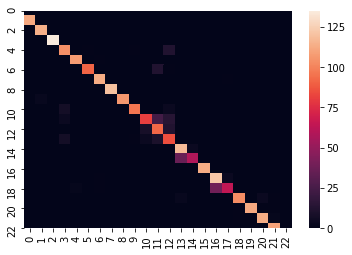

In [42]:
pred = model.predict(X)
pred = pred.argmax(axis=1)
cm = confusion_matrix(y,pred)
sns.heatmap(cm)

### Saving Neural Network Model

In [ ]:
#joblib.dump(model,'../output/nn.m')